# 2A.soft - Git depuis le notebook

[Git](http://fr.wikipedia.org/wiki/Git) est un logiciel de suivi de source décentralisé qui permet de travailler à plusieurs sur les mêmes fichiers. Aujourd'hui, on ne crée plus de logiciels sans ce type d'outil qui permet de garder l'historique des modifications apportées à un programme. [Git](http://fr.wikipedia.org/wiki/Git) a supplanté tous les autres logiciels du même type.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

 On vérifie qu'il fonctionne :

In [ ]:
!git

usage: git [--version] [--help] [-C <path>] [-c name=value]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p|--paginate|--no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

The most commonly used git commands are:
   add        Add file contents to the index
   bisect     Find by binary search the change that introduced a bug
   branch     List, create, or delete branches
   checkout   Checkout a branch or paths to the working tree
   clone      Clone a repository into a new directory
   commit     Record changes to the repository
   diff       Show changes between commits, commit and working tree, etc
   fetch      Download objects and refs from another repository
   grep       Print lines matching a pattern
   init       Create an empty Git repository or reinitialize an existing one
   log        Show commit logs
   merge      Join two or more develop

Si cela ne fonctionne pas, cela signifie que soit [git](http://git-scm.com/) n'est pas installé, soit le notebook ne trouve pas le chemin où il est installé. Dans le premier cas, il suffit de l'installer puis de relancer le serveur de notebook pour prendre en compte les modifications. Dans le second cas, on peut s'en tirer avec une astuce du style :

In [ ]:
!set PATH=%PATH%;chemin_git

Dans son utilisation la plus simple, *git* permet de synchroniser un ensemble de fichiers entre plusieurs ordinateurs et utilisateurs :

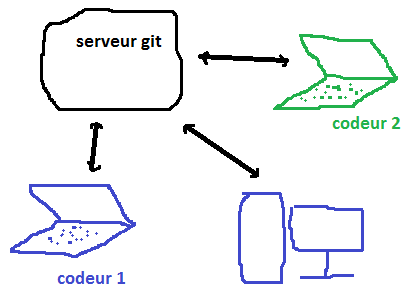

In [ ]:
import pyquickhelper
pyquickhelper.NbImage("gits.png")

Par la suite, il faudra remplacer ``SERVEURGIT`` par le nom du serveur *git* (le serveur de l'école, github, bitbucket, ...).

## Création d'un répertoire

On crée un projet afin de pouvoir y ajouter des fichiers et de suivre leur modifications. Cette opération ne devra être réalisé qu'une seule fois. On crée ce projet dans le répertoire : ``c:\temp\premier_projet``. On crée ce répertoire puis on change le répertoire courant pour celui-ci :

In [ ]:
import os
folder = r"c:/temp/premier_projet3"
if not os.path.exists(folder): os.mkdir(folder)

On initialise le répertoire :

In [ ]:
!git init c:/temp/premier_projet3

Initialized empty Git repository in c:/temp/premier_projet3/.git/


## Premiers fichiers

On ajoute un premier fichier ``README.md`` :

In [ ]:
%%file c:/temp/premier_projet3/README.md
    
Premier Projet
==============

* quelques listes

Writing c:/temp/premier_projet3/README.md


On copie ce notebook également :

In [ ]:
!copy git_notebook.ipynb c:\temp\premier_projet3

        1 fichier(s) copie(s).


Git est beaucoup plus facile à utiliser si on se place dans le repértoire du projet :

In [ ]:
import os
os.chdir("c:/temp/premier_projet3/")

Il faut préciser à *git* les fichiers qu'on souhaite ajouter où dont on souhaite enregister les modifications :

In [ ]:
!git add README.md
!git add git_notebook.ipynb

On enregistre ces modifications avec un commentaire :

In [ ]:
!git commit -m "premier fichier et premier notebook"

[master (root-commit) 152b34d] premier fichier et premier notebook
 2 files changed, 344 insertions(+)
 create mode 100644 README.md
 create mode 100644 git_notebook.ipynb


Ces modifications n'ont d'incidence que sur la copie en locale et n'ont pas encore été propagées jusqu'au serveur. On le fait en exécutant les deux instructions suivantes. La première précise dans quel répertoire du serveur *git* on souhaite ajouter les modifications. Il suffit en principe de ne le faire qu'une fois.

In [ ]:
!git remote add origin https://dupre@SERVEURGIT/dupre/premier_projet3.git

Si vous vous êtes trompé, vous pouvez revenir en arrière avec :

In [ ]:
!git remote remove origin

La seconde propage les modifications :

In [ ]:
!git push -u origin master

remote: Not Found
fatal: repository 'https://SERVEURGIT/dupre/premier_projet3.git/' not found


Si vous avez l'erreur précédente, c'est parce que le répertoire du projet n'a pas été créé sur le serveur git. Je vous conseille de le faire directement sur le serveur lui-même (petit icône + en haut à droite sur un serveur [GitLab](https://about.gitlab.com/)) :

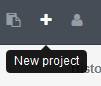

In [ ]:
from pyquickhelper.helpgen import NbImage
NbImage("gitsp.png")

On recommence, de préférence dans la fenêtre de ligne de commande car sinon il faudra taper le mot de passe depuis la fenêtre du serveur de notebook et ce n'est pas toujours évident de ne pas se tromper.

In [ ]:
!git push -u origin master

Les fichiers devrait être sur le serveur. Pour enregistrer d'autres modifications faite dans le répertoire local, il suffit de recommencer à partir de l'instruction ``git add``.

## Cloner un répertoire

Pour récupérer les fichiers chez soi. Il faut cloner le répertoire, par exemple dans un autre répertoire local.

In [ ]:
import os
folder = r"c:\temp\projet3_copy"
if not os.path.exists(folder): os.mkdir(folder)

Puis taper la commande dans ce répertoire (de préférence depuis la ligne de commande s'il y a besoin de s'authentifier).

In [ ]:
!git clone https://SERVEURGIT/dupre/premier_projet3.git/

In [ ]:
import os
os.listdir(r"C:\temp\projet3_copy")

['premier_projet3']

Pour apporter les modifications sur le serveur *git*, il faut retourner aux instructions ``git add`` vues précédemment.

## Mettre à jour un répertoire local

Lorqu'on met à jour le serveur distant *git* depuis une copie locale, il est préférable de mettre à jour les autres copies locales avant de pouvoir les modifier. Il vaut mieux exécuter la commande depuis une ligne de commande s'il faut s'authentifier.

In [ ]:
!git pull https://SERVEURGIT/dupre/premier_projet3.git/

## Branches

Le scénario classique pour travailler à plusieurs. On suppose qu'il existe un *repository* remote appelé *origin*. C'est le cas le plus classique quand on clone un répertoire de sources.

* On met à jour la branche principal : ``git pull`` (local = remote)
* On crée une branche local : ``git checkout -b name/branch``
* On fait sa modification.
* On commit. ``git add`` + ``git commit -m "..."``
* On met à jour le remote en créant aussi une branche là-bas : ``git push -u origin name/branch``.
* On envoie une [pull request](https://help.github.com/articles/about-pull-requests/).
* Le détenteur de la branche principale accepte ou vous demande des modifications.
* On détruit la branche une fois que les modifications sont faites ``git branch -d name/branch``.

Si la branche ``master`` est mise à jour pendant que vous travaillez à la vôtre, ``git pull origin master`` rappatriera les modifications.

## Pour aller plus loin

On peut faire beaucoup de choses avec *git* comme créer des branches, des tags, revenir à en arrière... La documentation sur git est assez pléthorique sur internet [tutoriels sur git](http://sixrevisions.com/resources/git-tutorials-beginners/) et il existe des [client git](http://git-scm.com/download/gui/linux). [TortoiseGit](https://code.google.com/p/tortoisegit/) est l'un des plus simples. Ces outils permettent de se servir de *git* sans ligne de commande, juste avec la souris et l'exporateur de fichiers.